# **Building a Perceptron Model from Scratch**
A perceptron is the simplest type of artificial neural network, designed for binary classification tasks.It Binary classifier inspired by biological neurons, Developed by Frank Rosenblatt in 1957.

##**Real-world Applications**

**Simple Classification Tasks**

- Email filtering (spam/not spam)
- Quality control (pass/fail)
- Basic pattern recognition


## **Limitations**

- Can only solve linearly separable problems
- Cannot solve XOR problem
- Binary output only
- Simple decision boundary (straight line)

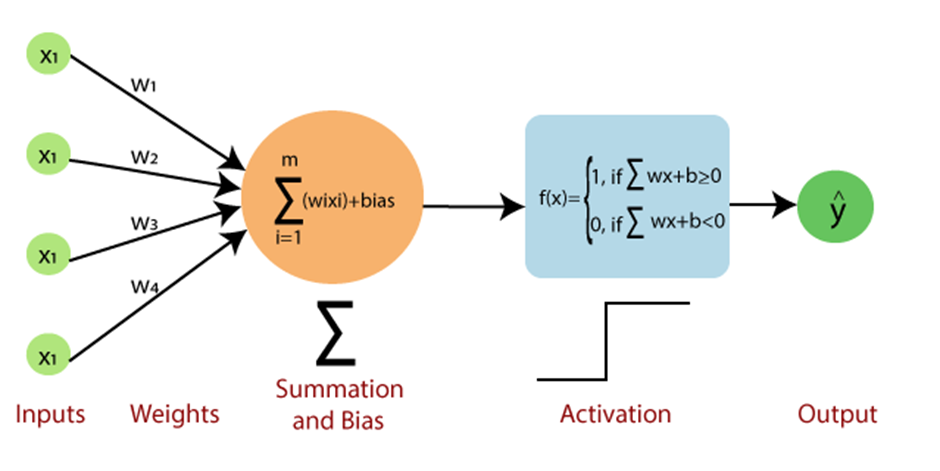

## **Basic Structure**

**Inputs (x₁, x₂, ..., xₙ)**

- Features or attributes
- Numerical values
- Binary or continuous


**Weights (w₁, w₂, ..., wₙ)**

- Importance of each input
- Learned during training
- Can be positive or negative


**Bias (b)**

- Offset or threshold
- Shifts decision boundary
- Similar to y-intercept in linear equation

**Output (y)**
- Binary Prediction (1/0)

## **Core Concepts**
The perceptron computes a weighted sum of inputs and applies an activation function (usually a step function) to produce a binary output.

### **1. Mathematical Model**
**Input Processing**

```
z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
z = Σ(wᵢxᵢ) + b
```


**Activation Function (Step Function)**

```
f(z) = 1 if z ≥ 0
f(z) = 0 if z < 0
```


### **2. Learning Process**
**Weight Update Rule**

```
w_new = w_old + learning_rate × (target - prediction) × input
Δw = η(y - ŷ)x
```
**Bias Update Rule**
```
b_new = b_old + learning_rate × (target - prediction)
Δb = η(y - ŷ)
```
### **3. Training Algorithm**
```
1. Initialize weights and bias (usually to small random values)
2. For each training example:
   a. Calculate prediction (forward pass)
   b. Compare with target value
   c. Update weights and bias if prediction is wrong
3. Repeat until convergence or maximum iterations
```
### **4. Decision Boundary**
**Linear Equation**
```
w₁x₁ + w₂x₂ + b = 0
x₂ = (-w₁/w₂)x₁ - b/w₂
```

## **Important Concepts**
### **Learning Rate (η)**

- Controls step size in weight updates
- Typical values: 0.1, 0.01, 0.001
- Trade-off between:
  - Speed of convergence
  - Stability of learning

### **Number of Iterations (Epochs)**
- Maximum number of training passes
- Stopping criteria:
  - No misclassifications
  - Maximum iterations reached

### **Activation Function**
- Decides whether a neuron should "activate" or not.
- Adds non-linearity (flexibility), helping the model learn complex patterns.

### **Binary Classification**
- Two possible outputs (0 or 1)
- Linear decision boundary
- Supervised learning

### **Linear Separability**
- Data must be linearly separable
- Explains XOR problem limitation
- Motivation for multi-layer networks

### **Convergence**
- Guaranteed if data is linearly separable
- Perceptron convergence theorem
- Finite number of steps

**Further reading:** **https**://www.simplilearn.com/tutorials/deep-learning-tutorial/perceptron

# Step by step Implementation

### You can ask your questions as comments on the notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

- Intialize weights and bias
- Weighted sum
- Activation function
- Update our weights and biases

## Initialization of Parameters

In [ ]:
# Initialize model parameters
def initialize_perceptron(n_features):
    weights = np.zeros(n_features)  # Initialize weights
    bias = 0  # Initialize bias
    return weights, bias

## Step Activation Function

In [ ]:
# Define the step activation function
def step_function(z):
    '''Step activation function'''
    return 1 if z >= 0 else 0

## Training the Perceptron

In [ ]:
# Train the perceptron
def train_perceptron(X, y, learning_rate=0.01, epochs=100):
    '''Train the perceptron on the dataset'''
    n_features = X.shape[1]
    weights, bias = initialize_perceptron(n_features)
    errors = []  # Track errors for each epoch

    for epoch in range(epochs): #For Every iteration
        err = 0  # Count errors for the epoch
        for idx, x_i in enumerate(X):
            z = np.dot(x_i, weights) + bias
            y_pred = step_function(z)

            # Update weights and bias
            update = learning_rate * (y[idx] - y_pred)
            weights += update * x_i
            bias += update

            # Count errors
            if update != 0:
                err += 1

        errors.append(err)
        print(f'Epoch {epoch + 1}/{epochs} : errors = {err}')

        # Early stopping if no errors
        if err == 0:
          print('Converged! Training ended early.')
          break

    print('Training Ended')
    return weights, bias, errors

## Prediction

In [ ]:
# Predict classes for input features
def predict(X, weights, bias):
    '''Predict classes for input features'''
    z = np.dot(X, weights) + bias
    return np.array([step_function(i) for i in z])

## Testing the Implementation

In [ ]:
# Example dataset (replace this with your data)
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])  # Features
y = np.array([1, 0, 0, 0])  # Labels

# Training
learning_rate = 0.01
epochs = 100
weights, bias, errors = train_perceptron(X, y, learning_rate, epochs)

# Prediction
predictions = predict(X, weights, bias)
print(f"Predictions: {predictions}")


Epoch 1/100 : errors = 1
Epoch 2/100 : errors = 3
Epoch 3/100 : errors = 2
Epoch 4/100 : errors = 2
Epoch 5/100 : errors = 3
Epoch 6/100 : errors = 2
Epoch 7/100 : errors = 2
Epoch 8/100 : errors = 0
Converged! Training ended early.
Training Ended
Predictions: [1 0 0 0]


# **PACKAGING IT IN A CLASS**

In [ ]:
class perceptron:
  def __init__(self, learning_rate=0.01, epochs=100):
    '''Initialize perceptron model parameters'''
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = None
    self.bias = None
    self.errors = [] #Track errors

  def step_function(self,z):
    '''Step activation function'''
    return 1 if z >=0 else 0

  def fit(self,X,y):
    '''Train the perceptron on the dataset'''
    n_features = X.shape[1]
    self.weights = np.zeros(n_features)  #Intializing weights
    self.bias = 0 #initializing bias

    for epoch in range(self.epochs):
      err = 0
      for idx,x_i in enumerate(X):
        z = np.dot(x_i, self.weights) + self.bias
        y_pred = self.step_function(z)


        #Update weights and biases
        update = self.learning_rate * (y[idx]-y_pred)
        self.weights += update * x_i
        self.bias += update

        #count errors
        if update != 0:
          err += 1

      self.errors.append(err)

      print(f'epochs {epoch + 1}/{self.epochs} : errors = {err}' )

      # Early stopping if no errors
      if err == 0:
          print('Converged! Training ended early.')
          break
    print('Training Ended')

  def predict(self,X):
    '''Predict classes for input features'''
    z = np.dot(X, self.weights) + self.bias
    return np.array([self.step_function(i) for i in z])


## Testing the class

In [ ]:
# prompt: write a code to generate a linearly separable data set with 3 features or more, having 2 classes

import numpy as np

def generate_linearly_separable_data(num_samples, num_features, num_classes):
    if num_classes != 2:
        raise ValueError("Number of classes must be 2 for linear separability.")

    # Generate random data points
    X = np.random.rand(num_samples, num_features)

    # Create a random hyperplane (decision boundary)
    w = np.random.rand(num_features)

    # Assign labels based on the hyperplane
    y = np.array([1 if np.dot(x, w) > 0.5 else 0 for x in X])

    return X, y


# Example usage (generating 100 samples with 3 features and 2 classes):
X, y = generate_linearly_separable_data(num_samples=100, num_features=3, num_classes=2)

# Print the first 10 samples and their labels to verify
for i in range(10):
  print(f"Sample {i+1}: Features={X[i]}, Label={y[i]}")

Sample 1: Features=[0.45043299 0.75827319 0.56386885], Label=1
Sample 2: Features=[0.13204213 0.22037527 0.78419785], Label=1
Sample 3: Features=[0.00162522 0.81323023 0.28090305], Label=1
Sample 4: Features=[0.47713185 0.85080486 0.77119856], Label=1
Sample 5: Features=[0.84422151 0.04429624 0.15418525], Label=0
Sample 6: Features=[0.06024083 0.40407548 0.00434072], Label=0
Sample 7: Features=[0.64892333 0.63381776 0.37856926], Label=1
Sample 8: Features=[0.32990781 0.77725429 0.07188607], Label=1
Sample 9: Features=[0.51365364 0.26470655 0.44444209], Label=1
Sample 10: Features=[0.78279199 0.07148236 0.74091184], Label=1


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = perceptron(learning_rate=0.001, epochs=100)
model.fit(X_train, y_train)

epochs 1/100 : errors = 11
epochs 2/100 : errors = 8
epochs 3/100 : errors = 2
epochs 4/100 : errors = 8
epochs 5/100 : errors = 7
epochs 6/100 : errors = 4
epochs 7/100 : errors = 0
Converged! Training ended early.
Training Ended


In [ ]:
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

In [ ]:
test_accuracy

1.0

In [ ]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        19

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
# Make predictions on sample points from test set
sample_points = X_test[:50]
predictions = model.predict(sample_points)

print("\nSample Predictions from Test Set:")
print("--------------------------------")
for i, (point, pred, actual) in enumerate(zip(sample_points, predictions, y_test[:50])):
    print(f"Point {i+1}: {point} -> Predicted: {pred}, Actual: {actual}")


Sample Predictions from Test Set:
--------------------------------
Point 1: [0.7439053  0.73233785 0.99077786] -> Predicted: 1, Actual: 1
Point 2: [0.50238171 0.62894238 0.95250916] -> Predicted: 1, Actual: 1
Point 3: [0.48579662 0.43095129 0.65079553] -> Predicted: 1, Actual: 1
Point 4: [0.11498022 0.41740681 0.57703293] -> Predicted: 1, Actual: 1
Point 5: [0.78524441 0.09985751 0.94756622] -> Predicted: 1, Actual: 1
Point 6: [0.672427   0.89290285 0.46736937] -> Predicted: 1, Actual: 1
Point 7: [0.65404857 0.20213558 0.38632929] -> Predicted: 1, Actual: 1
Point 8: [0.38481442 0.98564498 0.30900267] -> Predicted: 1, Actual: 1
Point 9: [0.41120717 0.33192915 0.62421944] -> Predicted: 1, Actual: 1
Point 10: [0.45043299 0.75827319 0.56386885] -> Predicted: 1, Actual: 1
Point 11: [0.75024941 0.05061395 0.71160513] -> Predicted: 1, Actual: 1
Point 12: [0.09013429 0.79175877 0.38874849] -> Predicted: 1, Actual: 1
Point 13: [0.15776114 0.48133512 0.4508504 ] -> Predicted: 1, Actual: 1
Point

In [ ]:
# # Create a linearly separable dataset
X, y = make_classification(n_samples=100, n_features=6, n_classes=2,
                         n_clusters_per_class=1, n_redundant=0,
                         random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = perceptron(learning_rate=0.001, epochs=100)
model.fit(X_train, y_train)

epochs 1/100 : errors = 9
epochs 2/100 : errors = 5
epochs 3/100 : errors = 1
epochs 4/100 : errors = 1
epochs 5/100 : errors = 0
Converged! Training ended early.
Training Ended


In [ ]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [ ]:
test_accuracy

1.0

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
# Make predictions on sample points from test set
sample_points = X_test[:5]
predictions = model.predict(sample_points)

print("\nSample Predictions from Test Set:")
print("--------------------------------")
for i, (point, pred, actual) in enumerate(zip(sample_points, predictions, y_test[:5])):
    print(f"Point {i+1}: {point} -> Predicted: {pred}, Actual: {actual}")


Sample Predictions from Test Set:
--------------------------------
Point 1: [-0.02090159 -0.59157139  0.11732738 -0.76408578  1.29021194  1.2776649 ] -> Predicted: 0, Actual: 0
Point 2: [-0.71530371  0.21645859  0.67959775 -0.36699364  1.88782031 -0.73036663] -> Predicted: 0, Actual: 0
Point 3: [ 0.2597225  -1.66152006 -0.90431663  1.11434941  1.04031359  0.63859246] -> Predicted: 1, Actual: 1
Point 4: [ 0.50091719  0.75138712 -0.97755524  2.50225822  2.54881729  0.09933231] -> Predicted: 1, Actual: 1
Point 5: [ 1.16316375  0.46210347  0.01023306 -0.33281274  1.83708868 -0.98150865] -> Predicted: 0, Actual: 0
